In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
engine

Engine(sqlite:///../Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement 
Station=Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
print('Last date{}'.format(last_date))


Last date('2017-08-23',)


Year ago2016-08-23


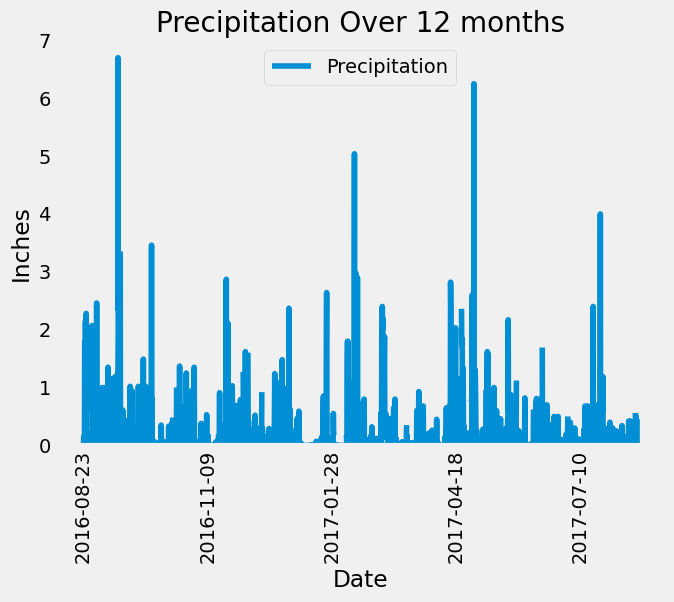

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


recent_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()
        
# pprint(recent_prcp)


# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago=dt.date(2017,8,23)-dt.timedelta(days=365) 
print('Year ago{}'.format(year_ago))


# Perform a query to retrieve the data and precipitation scores

scores=session.query(Measurement.date,
Measurement.prcp).filter(Measurement.date>year_ago).\
order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

scores_pd = pd.DataFrame(recent_prcp, columns = ["Date", "Precipitation"])

# set index to the date column

scores_pd.set_index("Date", inplace=True)

scores_pd



# Sort the dataframe by date


scores_pd.sort_values(by = ["Date"], ascending = True, inplace = True)


# Use Pandas Plotting with Matplotlib to plot the data

prcp_plot = scores_pd.plot(figsize=(7,5), ylim=(0,7), title = "Precipitation Over 12 months", rot=90)
prcp_plot.set_ylabel("Inches")
prcp_plot.set_xlabel("Date")
prcp_plot.grid()
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation = scores_pd["Precipitation"].to_frame()
precipitation.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(Measurement.station))).first()[0]
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]  # Assuming the most active station is the first one in the list

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station == most_active_station) \
    .all()

# Extracting the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Print the results
print(f"Most Active Station: {most_active_station}")
print(f"Lowest Temperature: {lowest_temp} °F")
print(f"Highest Temperature: {highest_temp} °F")
print(f"Average Temperature: {round(avg_temp, 2)} °F")


Most Active Station: USC00519281
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66 °F


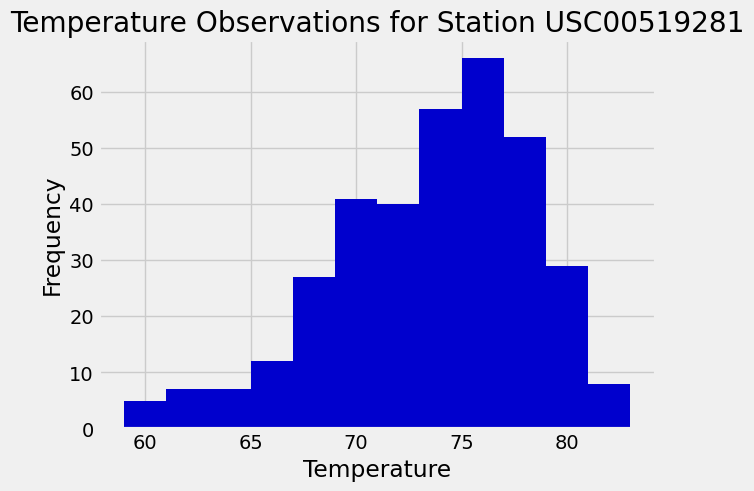

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 
# Assuming Measurement is the class representing the 'measurement' table

tobs_station = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == "USC00519281").all()

tobs_station


station_temp_df = pd.DataFrame(tobs_station, columns=["Station", "Temp. Observations"])
station_temp_df


station_temp_df["Temp. Observations"].hist(bins=12, color="mediumblue")
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()